### Instalação de bibliotecas

In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


### Carregamento de dataset

In [2]:
import pandas as pd

# Caminho exato do seu arquivo..
caminho_do_arquivo = r"C:\Users\arthu\OneDrive\Documentos\DATA ANALYSIS\NPS for financial services\NPS_timeseries_clean.xlsx"

# Carrega o arquivo Excel para um DataFrame
df = pd.read_excel(caminho_do_arquivo)

print("Dataset carregado")

Dataset carregado


### Exploração inicial

In [3]:
# 5 primeiras linhas do DataFrame para confirmar que o carregamento deu certo
print("Primeiras 5 linhas do dataset:")
print(df.head())

# Mostra informações sobre as colunas, tipos de dados e valores nulos
print("\nInformações sobre as colunas e tipos de dados:")
df.info()

Primeiras 5 linhas do dataset:
     ID Market Survey date    Customer Name  Month  Quarter  NPS      Class
0  1000     US  2021-09-01  Krista Richards      9        3   10   Promoter
1  1001    MEX  2021-11-07      Monica King     11        4    9   Promoter
2  1002     UK  2021-12-25  Ricky Armstrong     12        4    0  Detractor
3  1003     UK  2021-10-01     Andrea Foley     10        4   10   Promoter
4  1004     UK  2021-03-01     Jerry Garcia      3        1    8    Neutral

Informações sobre as colunas e tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             5000 non-null   int64         
 1   Market         5000 non-null   object        
 2   Survey date    5000 non-null   datetime64[ns]
 3   Customer Name  5000 non-null   object        
 4   Month          5000 non-null   int64         
 5

# 1-Cálculo NPS geral:

Porcentagem de Promotores: 46.18%
Porcentagem de Detratores: 34.38%

Net Promoter Score (NPS): 11.80


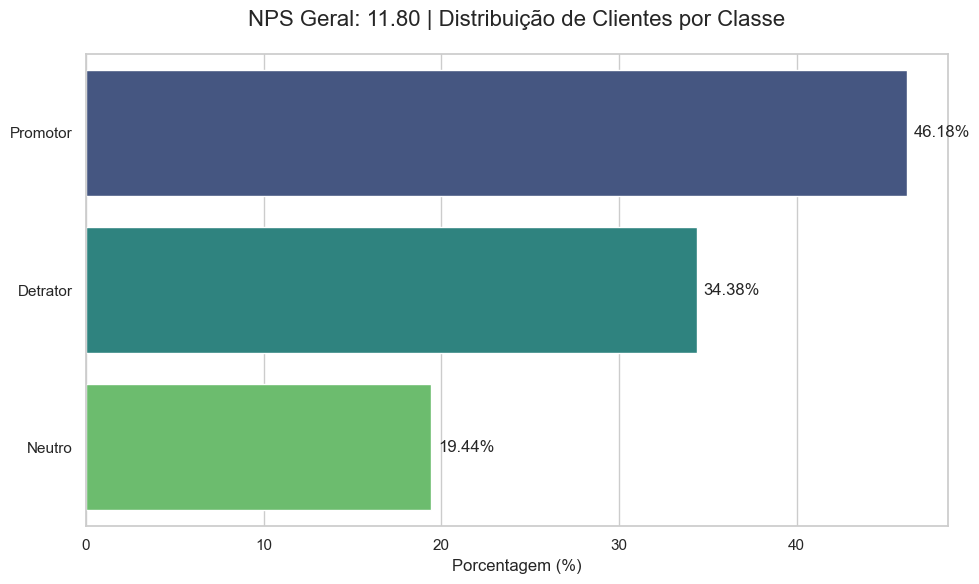

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obter a contagem de cada classe de cliente
nps_counts = df['Class'].value_counts()
total_respondents = len(df)

# 2. Calcular a porcentagem de cada classe
promoter_percentage = (nps_counts.get('Promoter', 0) / total_respondents) * 100
detractor_percentage = (nps_counts.get('Detractor', 0) / total_respondents) * 100
neutral_percentage = (nps_counts.get('Neutral', 0) / total_respondents) * 100 # Inclusão dos Neutros para visualização

# 3. Calcular o NPS
nps_score = promoter_percentage - detractor_percentage

# 4. Criar um DataFrame para a visualização
nps_percentages = pd.DataFrame({
    'Classe': ['Promotor', 'Neutro', 'Detrator'],
    'Porcentagem': [promoter_percentage, neutral_percentage, detractor_percentage]
}).sort_values(by='Porcentagem', ascending=False)

# Exibir os resultados
print(f"Porcentagem de Promotores: {promoter_percentage:.2f}%")
print(f"Porcentagem de Detratores: {detractor_percentage:.2f}%")
print(f"\nNet Promoter Score (NPS): {nps_score:.2f}")

# 5. Criar a visualização
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = ,
# Adicionar o NPS Score como um título na parte superior
plt.title(f'NPS Geral: {nps_score:.2f} | Distribuição de Clientes por Classe', fontsize=16, pad=20)
plt.xlabel('Porcentagem (%)', fontsize=12)
plt.ylabel('')

plt.tight_layout()
plt.show()

##### - Com um NPS de 11.80, o desempenho da empresa é considerado na faixa "Justo" a "Bom", mas está longe de ser excelente. A porcentagem de promotores está relativamente baixa e os detratores representam uma parte significativa da base de clientes.

##### - É um resultado que sinaliza a necessidade de ações estratégicas para converter clientes neutros em promotores e, principalmente, reduzir o número de detratores.

# 2-Distribuição por Classe de Cliente:

In [7]:
# Bibliotecas de visualização
!pip install matplotlib seaborn

### Visualização por classe de clientes

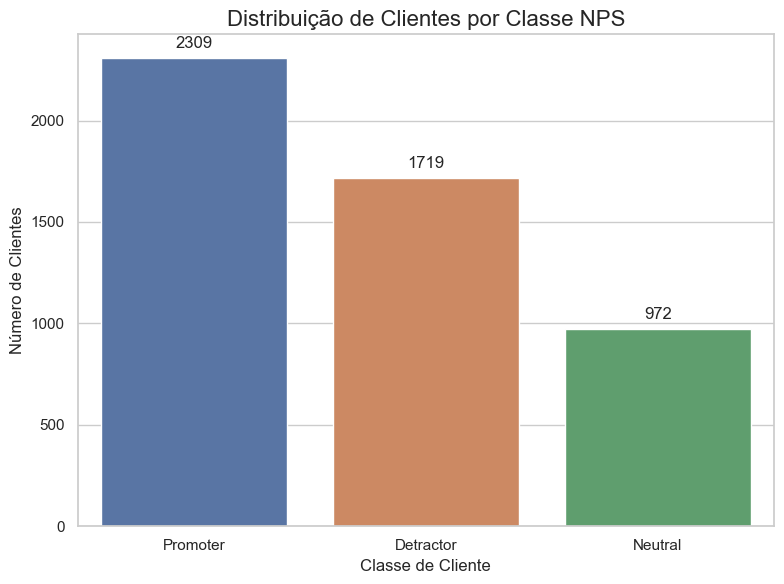

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do gráfico
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Contagem de cada classe e ordena para o gráfico
nps_counts = df['Class'].value_counts().sort_values(ascending=False)

# Gráfico de barras com a nova sintaxe
ax = sns.barplot(x=nps_counts.index, y=nps_counts.values, hue=nps_counts.index, legend=False)

# Adiciona os títulos e rótulos
plt.title('Distribuição de Clientes por Classe NPS', fontsize=16)
plt.xlabel('Classe de Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Adiciona a contagem exata acima de cada barra
for i in ax.containers:
    ax.bar_label(i, fmt='%d', padding=5)

plt.tight_layout()
plt.show()

# 3-Análise por Mercado:

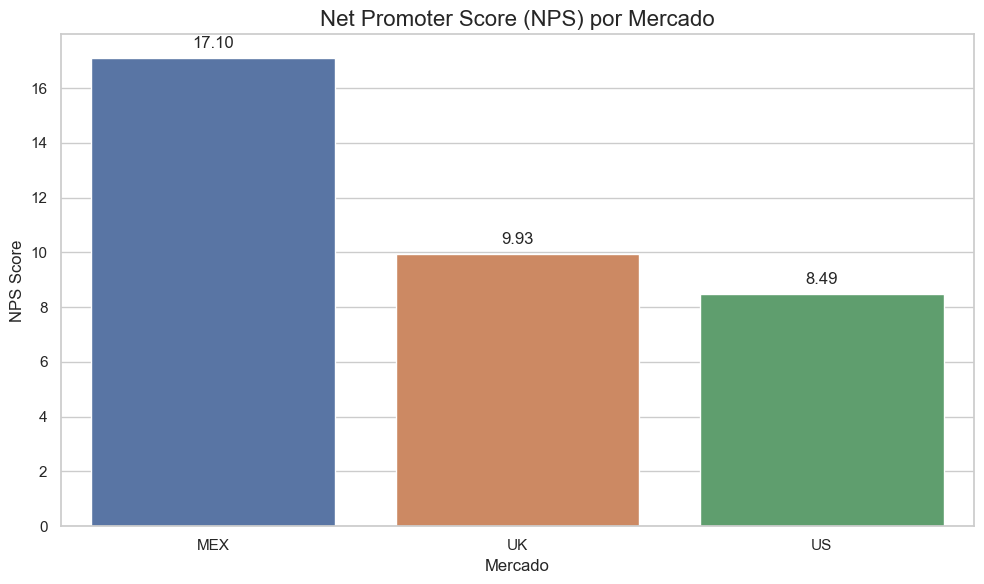

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar os dados por Mercado e por Classe para contar os clientes
nps_by_market = df.groupby(['Market', 'Class']).size().unstack(fill_value=0)

# 2. Calcular o total de respondentes por mercado
nps_by_market['Total'] = nps_by_market.sum(axis=1)

# 3. Calcular a porcentagem de Promotores e Detratores por mercado
nps_by_market['% Promotores'] = (nps_by_market['Promoter'] / nps_by_market['Total']) * 100
nps_by_market['% Detratores'] = (nps_by_market['Detractor'] / nps_by_market['Total']) * 100

# 4. Calcular o NPS por mercado
nps_by_market['NPS Score'] = nps_by_market['% Promotores'] - nps_by_market['% Detratores']

# 5. Criar o gráfico
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=nps_by_market.index, y='NPS Score', data=nps_by_market.sort_values(by='NPS Score', ascending=False), hue=nps_by_market.index, legend=False)

# Adicionar o valor exato do NPS acima de cada barra
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=5)

# Títulos e rótulos
plt.title('Net Promoter Score (NPS) por Mercado', fontsize=16)
plt.xlabel('Mercado', fontsize=12)
plt.ylabel('NPS Score', fontsize=12)

plt.tight_layout()
plt.show()

# 4-Tendência do NPS ao Longo do Tempo por Mercado:

C:\Users\arthu\AppData\Local\Temp\ipykernel_15856\2127037608.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nps_by_quarter_market = df.groupby(['Quarter', 'Market']).apply(lambda x: (


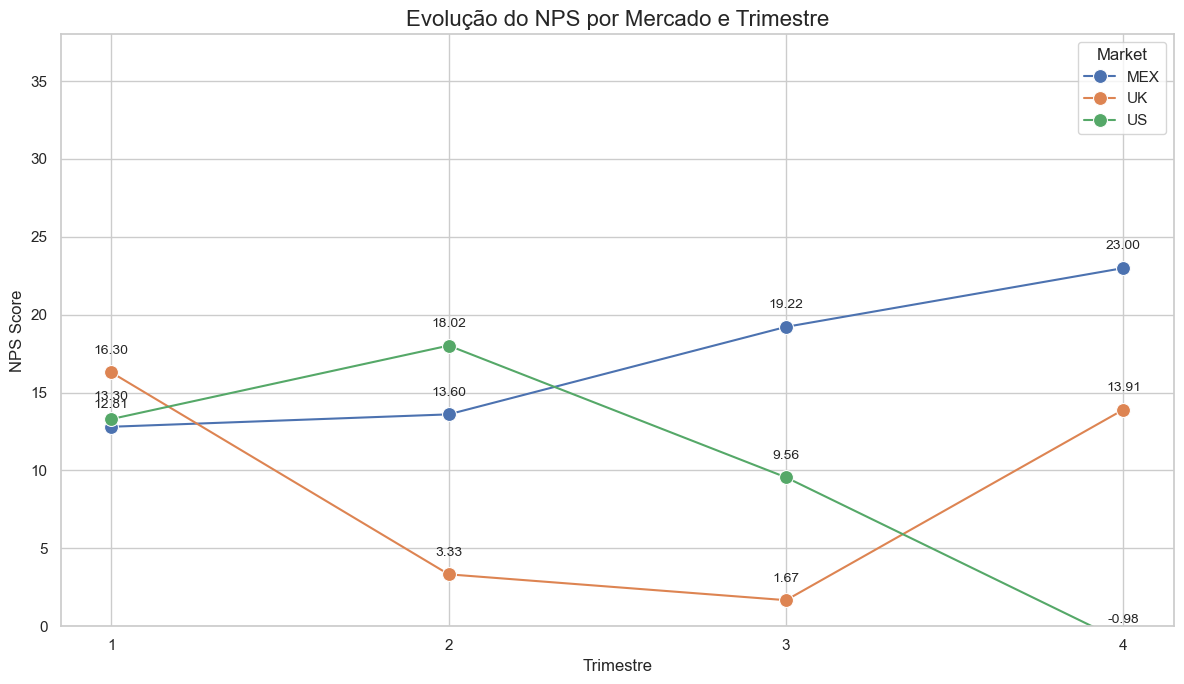

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa por Trimestre e Mercado para calcular o NPS de cada um
# Removed the invalid 'include_groups=False' parameter
nps_by_quarter_market = df.groupby(['Quarter', 'Market']).apply(lambda x: (
    (x['Class'].eq('Promoter').sum() - x['Class'].eq('Detractor').sum()) / len(x)
) * 100).reset_index(name='NPS Score')

# Cria o gráfico de linhas
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")
sns.lineplot(
    x='Quarter', 
    y='NPS Score', 
    hue='Market', 
    data=nps_by_quarter_market, 
    marker='o', 
    markersize=10
)

# Adiciona os valores de NPS em cada ponto
for index, row in nps_by_quarter_market.iterrows():
    plt.text(row['Quarter'], row['NPS Score'] + 1, f"{row['NPS Score']:.2f}", 
             ha='center', va='bottom', fontsize=10)

# Títulos e Rótulos
plt.title('Evolução do NPS por Mercado e Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('NPS Score', fontsize=12)
plt.xticks(nps_by_quarter_market['Quarter'].unique())
plt.ylim(0, max(nps_by_quarter_market['NPS Score']) + 15)

plt.tight_layout()
plt.show()

##### - México (MEX) tem a melhor trajetória, com um crescimento constante do NPS ao longo dos quatro trimestres, terminando o ano com uma pontuação sólida.

##### - O Reino Unido (UK) teve uma queda significativa no segundo e terceiro trimestres, atingindo a sua pior performance, mas mostrou uma recuperação notável no último trimestre.

##### - Já os Estados Unidos (US), que começaram o ano com um NPS forte, tiveram uma queda acentuada e terminaram o ano com um NPS negativo, o que é um sinal de alerta.

# 5-Análise granular de NPS por mercado e Mês

C:\Users\arthu\AppData\Local\Temp\ipykernel_15856\2918425541.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nps_by_month_market = df.groupby(['Month', 'Market']).apply(lambda x: (


Tabela de NPS por Mercado e Mês:
Market        MEX         UK         US
Month                                  
1       14.503817  15.972222   9.677419
2        4.861111  13.953488  12.000000
3       19.847328  18.939394  18.439716
4        5.223881   5.303030  18.400000
5       33.103448   0.000000  16.058394
6        1.428571   5.426357  19.696970
7       17.567568  14.044944  -3.401361
8       17.721519  -8.219178  19.841270
9       22.900763  -3.246753  14.074074
10      25.806452  -3.649635   4.444444
11       6.870229  30.000000  -0.689655
12      36.363636  15.000000  -7.031250


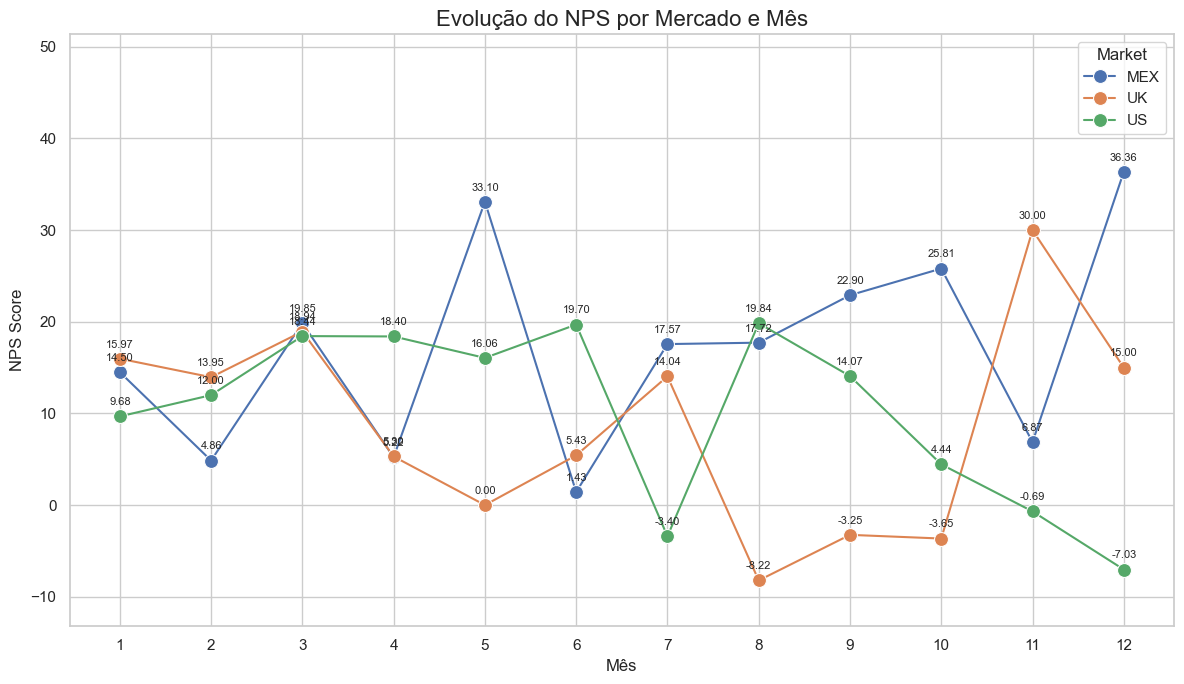

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa por Mês e Mercado para calcular o NPS de cada um
# Este script está baseado na versão que você validou.
nps_by_month_market = df.groupby(['Month', 'Market']).apply(lambda x: (
    (x['Class'].eq('Promoter').sum() - x['Class'].eq('Detractor').sum()) / len(x)
) * 100).reset_index(name='NPS Score')

# ---
# Seção de Dados Numéricos
# Exibe a tabela com o NPS de cada mercado por mês
print("Tabela de NPS por Mercado e Mês:")
print(nps_by_month_market.pivot_table(index='Month', columns='Market', values='NPS Score', sort=False))

# ---
# Seção de Visualização
# Cria o gráfico de linhas com os mesmos dados
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")
sns.lineplot(
    x='Month', 
    y='NPS Score', 
    hue='Market', 
    data=nps_by_month_market, 
    marker='o', 
    markersize=10
)

# Adiciona os valores de NPS em cada ponto no gráfico
for index, row in nps_by_month_market.iterrows():
    plt.text(row['Month'], row['NPS Score'] + 1, f"{row['NPS Score']:.2f}", 
             ha='center', va='bottom', fontsize=8)

# Títulos e Rótulos
plt.title('Evolução do NPS por Mercado e Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('NPS Score', fontsize=12)
plt.xticks(range(1, 13))
plt.ylim(min(nps_by_month_market['NPS Score']) - 5, max(nps_by_month_market['NPS Score']) + 15)

plt.tight_layout()
plt.show()

##### - MEX: O crescimento do NPS no México não foi constante, mas sim volátil, com uma queda em fevereiro e em junho, mas com uma recuperação impressionante nos últimos meses do ano, atingindo um pico de 36.36 em dezembro. A trajetória geral é de sucesso.

##### - UK: A linha do NPS do Reino Unido conta uma história de crise e recuperação. Após uma queda drástica, o ponto mais baixo foi de -8.22 em agosto. No entanto, houve uma virada espetacular em novembro, com um salto para 30.00, o que sugere que algo muito positivo aconteceu naquele mês.

##### - US: O NPS dos Estados Unidos começou a dar sinais de problema em maio e se tornou negativo em julho (-3.40). A tendência de queda continuou, com o mercado terminando o ano com um NPS de -7.03 em dezembro. Este é o mercado que exige mais atenção imediata.